In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from graphviz import Source
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing


In [11]:
train=pd.read_csv('C:\\Users\\jurk\\Desktop\\train.csv', index_col=[0])
test=pd.read_csv('C:\\Users\\jurk\\Desktop\\test.csv', index_col=[0])

In [8]:
def dataset_overview(data, col):
    
    print("------------")
    #print(data.head())
    print("-----------")
    print("---------------")

    print(data.columns)
    print("------------")
    print("---------------")

    print("Shape of the dataset")
    print(data.shape)
    print("-------------")
    print("---------------")

    print("Null Value counts")
    print(data.isnull().sum())
    print("-------------")
    print("---------------")

    print("dataset informaation")
    print(data.info())
    print("---------------")
    print("---------------")
    
    print("The outcome values",data[col].value_counts(normalize=True))
    plt.figure(figsize=(10,5))
    print(sns.countplot(x=col, data=data))
    plt.show()

------------
-----------
---------------
Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
------------
---------------
Shape of the dataset
(103904, 24)
-------------
---------------
Null Value counts
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service   

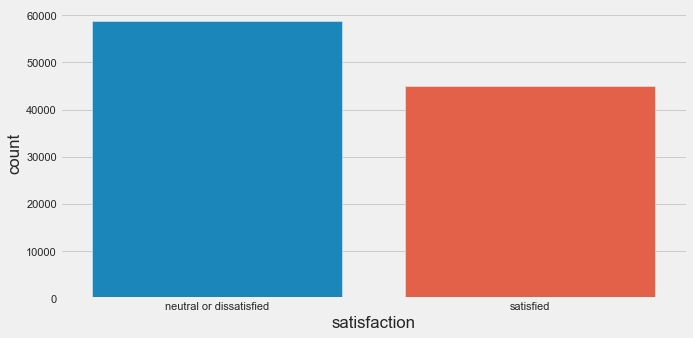

In [9]:
dataset_overview(train, 'satisfaction')

In [12]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0


In [13]:
test.shape

(25976, 23)

In [14]:
test.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
for _ in train.columns:
    print("The number of null values in:{} == {}".format(_, train[_].isnull().sum()))

The number of null values in:id == 0
The number of null values in:Gender == 0
The number of null values in:Customer Type == 0
The number of null values in:Age == 0
The number of null values in:Type of Travel == 0
The number of null values in:Class == 0
The number of null values in:Flight Distance == 0
The number of null values in:Inflight wifi service == 0
The number of null values in:Departure/Arrival time convenient == 0
The number of null values in:Ease of Online booking == 0
The number of null values in:Gate location == 0
The number of null values in:Food and drink == 0
The number of null values in:Online boarding == 0
The number of null values in:Seat comfort == 0
The number of null values in:Inflight entertainment == 0
The number of null values in:On-board service == 0
The number of null values in:Leg room service == 0
The number of null values in:Baggage handling == 0
The number of null values in:Checkin service == 0
The number of null values in:Inflight service == 0
The number 

In [16]:
for _ in test.columns:
    print("The number of null values in:{} == {}".format(_, test[_].isnull().sum()))

The number of null values in:id == 0
The number of null values in:Gender == 0
The number of null values in:Customer Type == 0
The number of null values in:Age == 0
The number of null values in:Type of Travel == 0
The number of null values in:Class == 0
The number of null values in:Flight Distance == 0
The number of null values in:Inflight wifi service == 0
The number of null values in:Departure/Arrival time convenient == 0
The number of null values in:Ease of Online booking == 0
The number of null values in:Gate location == 0
The number of null values in:Food and drink == 0
The number of null values in:Online boarding == 0
The number of null values in:Seat comfort == 0
The number of null values in:Inflight entertainment == 0
The number of null values in:On-board service == 0
The number of null values in:Leg room service == 0
The number of null values in:Baggage handling == 0
The number of null values in:Checkin service == 0
The number of null values in:Inflight service == 0
The number 

In [17]:
train=train.fillna(train.mean())

In [18]:
test=test.fillna(test.mean())

In [19]:
#from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")


In [20]:
def correlation_matrix(data):
    corr = data.corr().round(2)

    # Mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set figure size
    f, ax = plt.subplots(figsize=(20, 20))

    # Define custom colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap
    d=sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.tight_layout()
    return d

<AxesSubplot:>

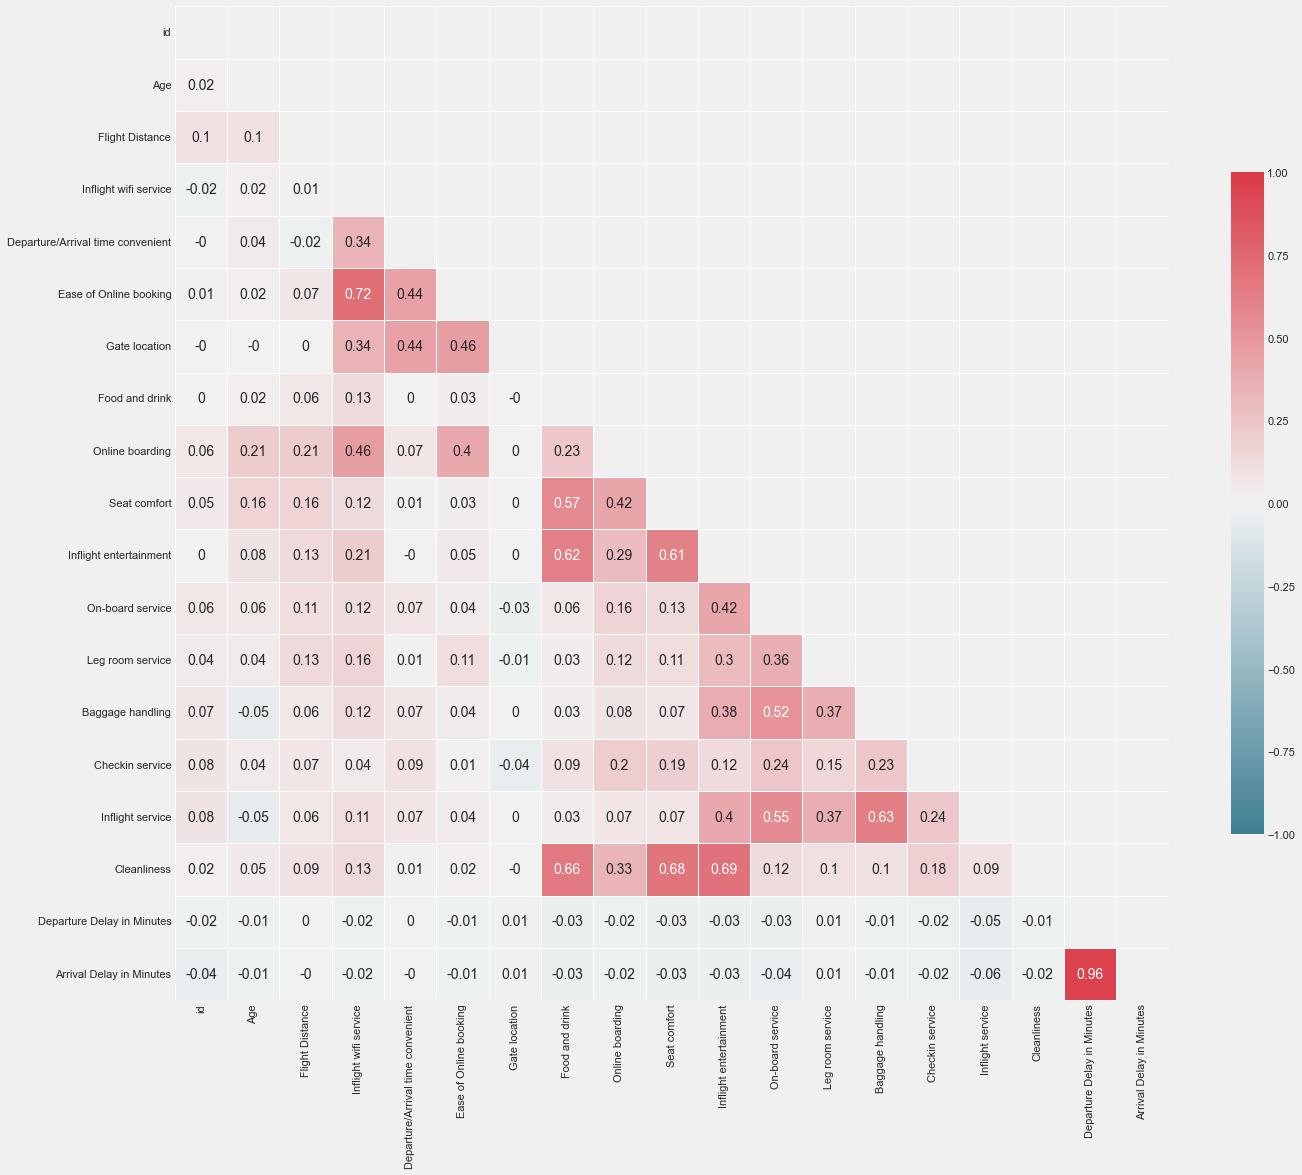

In [21]:
correlation_matrix(train)

In [22]:
def label_encoding(data, col):
    label_encoder = preprocessing.LabelEncoder()
    data[col]=label_encoder.fit_transform(data[col])
    return data[col].head()

In [23]:
label_encoding(train, 'Gender')
label_encoding(train, 'Customer Type')
label_encoding(train, 'Type of Travel')
label_encoding(train, 'satisfaction')
label_encoding(train, 'Class')






0    2
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int32  
 2   Customer Type                      103904 non-null  int32  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int32  
 5   Class                              103904 non-null  int32  
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [25]:
X = train.drop(['satisfaction'], axis=1)
y = train['satisfaction']

In [26]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X, y)



LogisticRegression(solver='liblinear')

In [27]:
import pickle

In [29]:
y_pred_train_rf = clf_lr.predict(X)
print(classification_report(y, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     58879
           1       0.85      0.84      0.84     45025

    accuracy                           0.87    103904
   macro avg       0.86      0.86      0.86    103904
weighted avg       0.87      0.87      0.87    103904



# Test dataset

In [31]:
label_encoding(test, 'Gender')
label_encoding(test, 'Customer Type')
label_encoding(test, 'Type of Travel')
label_encoding(test, 'Class')

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int32

In [32]:
from joblib import dump, load

In [33]:
dump(clf_lr, 'pipe.joblib') 

['pipe.joblib']

In [34]:
def prediction_pickle(path_model, input_data):
    s=load(path_model)
    #input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [35]:
prediction_pickle('./pipe.joblib', test)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,prediction
0,19556,0,0,52,0,1,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,0
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,0
25974,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [43]:
def prediction_pickle(path_model, input_data):
    s=load(path_model)
    #input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [47]:
test.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'prediction'],
      dtype='object')

In [44]:
#input_data='C:\\Users\\jurk\\Desktop\\test.csv'

# Pipeline building

In [48]:
train=pd.read_csv('C:\\Users\\jurk\\Desktop\\train.csv', index_col=[0])
test=pd.read_csv('C:\\Users\\jurk\\Desktop\\test.csv', index_col=[0])

------------
-----------
---------------
Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
------------
---------------
Shape of the dataset
(103904, 24)
-------------
---------------
Null Value counts
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service   

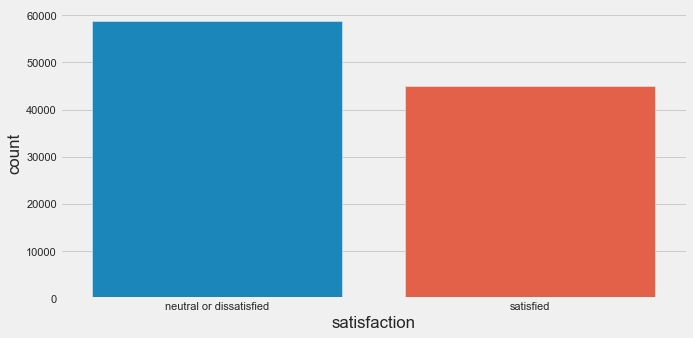

In [49]:
dataset_overview(train, 'satisfaction')

In [50]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [51]:
train=train.fillna(train.mean())


In [52]:
for _ in train.columns:
    print("The number of null values in:{} == {}".format(_, train[_].isnull().sum()))

The number of null values in:id == 0
The number of null values in:Gender == 0
The number of null values in:Customer Type == 0
The number of null values in:Age == 0
The number of null values in:Type of Travel == 0
The number of null values in:Class == 0
The number of null values in:Flight Distance == 0
The number of null values in:Inflight wifi service == 0
The number of null values in:Departure/Arrival time convenient == 0
The number of null values in:Ease of Online booking == 0
The number of null values in:Gate location == 0
The number of null values in:Food and drink == 0
The number of null values in:Online boarding == 0
The number of null values in:Seat comfort == 0
The number of null values in:Inflight entertainment == 0
The number of null values in:On-board service == 0
The number of null values in:Leg room service == 0
The number of null values in:Baggage handling == 0
The number of null values in:Checkin service == 0
The number of null values in:Inflight service == 0
The number 

# Categorical feature

In [53]:
categorical_features=['Gender', 'Customer Type', 'Type of Travel', 'Class']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# Numerical features

In [54]:
numeric_features=['id', 'Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

In [55]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [56]:
pipeline = Pipeline(
    [
        
        ('preprocessing', preprocessor),
        ('clf', LogisticRegression())
    ]
)

In [57]:
params = {
    'clf__solver': ['liblinear'],
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__random_state': [42]
}

In [58]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV


In [59]:
cv = KFold(2, shuffle=True, random_state=42)


In [60]:
warnings.filterwarnings('ignore')
ramd_grid = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=100, verbose=1, random_state=42)


In [61]:
def label_encoding(data, col):
    label_encoder = preprocessing.LabelEncoder()
    data[col]=label_encoder.fit_transform(data[col])
    return data[col].head()

In [62]:
label_encoding(train, 'satisfaction')


0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int32

In [63]:
X=train.drop('satisfaction', axis=1)
y=train.satisfaction

In [64]:
import warnings
ramd_grid.fit(X,y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                           

In [66]:
ramd_grid.best_params_


{'clf__solver': 'liblinear',
 'clf__random_state': 42,
 'clf__penalty': 'l2',
 'clf__C': 10}

In [67]:
# Get the performance of the model in the train set
y_pred_train_rf = ramd_grid.predict(X)
print(classification_report(y, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     58879
           1       0.87      0.84      0.85     45025

    accuracy                           0.88    103904
   macro avg       0.88      0.87      0.87    103904
weighted avg       0.88      0.88      0.88    103904



# Pickle File for pipeline storage

In [68]:
import pickle
from joblib import dump, load

In [69]:
dump(ramd_grid, 'pipeline.joblib') 


['pipeline.joblib']

In [72]:
def prediction_pickle(path_model, path_data):
    s=load(path_model)
    input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [74]:
path_model='C:\\Users\\jurk\\pipeline.joblib'
path_data='C:\\Users\\jurk\\Desktop\\test.csv'

In [75]:
prediction_pickle(path_model, input_data)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,prediction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,0
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1


# Pipeline Using Random Forest

In [80]:
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', RandomForestClassifier())
    ]
)

In [81]:
params={ "clf__n_estimators": [10, 100, 1000],
                 "clf__max_depth":[5,8,15,25,30,None],
                 "clf__min_samples_leaf":[1,2,5,10,15,100],
                 "clf__max_leaf_nodes": [2, 5,10]
       }

In [82]:
cv = KFold(2, shuffle=True, random_state=42)


In [83]:
warnings.filterwarnings('ignore')
ramd_grid_rf = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=100, verbose=1, random_state=42)

In [84]:
import warnings
ramd_grid_rf.fit(X,y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                           

In [85]:
ramd_grid_rf.best_params_


{'clf__n_estimators': 10,
 'clf__min_samples_leaf': 1,
 'clf__max_leaf_nodes': 10,
 'clf__max_depth': 25}

In [86]:
# Get the performance of the model in the train set
y_pred_train_rf = ramd_grid_rf.predict(X)
print(classification_report(y, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     58879
           1       0.90      0.87      0.89     45025

    accuracy                           0.90    103904
   macro avg       0.90      0.90      0.90    103904
weighted avg       0.90      0.90      0.90    103904



# Pickle File for pipeline storage

In [87]:
dump(ramd_grid_rf, 'pipeline_rf.joblib') 


['pipeline_rf.joblib']

In [88]:
path_model='C:\\Users\\jurk\\pipeline_rf.joblib'
path_data='C:\\Users\\jurk\\Desktop\\test.csv'

In [89]:
def prediction_pickle(path_model, path_data):
    s=load(path_model)
    input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [90]:
prediction_pickle(path_model, input_data)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,prediction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1


# Pipeline using XGBoost

In [91]:
categorical_features=['Gender', 'Customer Type', 'Type of Travel', 'Class']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

In [92]:
numeric_features=['id', 'Age',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

In [93]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [94]:
# Create the pipeline, with the tranformer and the model
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', XGBClassifier())
    ]
)

In [95]:
params={
        "clf__n_estimators": np.arange(50, 750, 50), 
        "clf__max_depth": np.arange(2, 10, 1),
        'clf__lambda': [0.5,0.75,1,1.5],
        'clf__alpha': [0,0.5,0.75,1,1.5]
    }

In [96]:
cv = KFold(2, shuffle=True, random_state=42)


In [97]:
warnings.filterwarnings('ignore')
ramd_grid = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=100, verbose=1, random_state=42)

In [98]:
import warnings
ramd_grid.fit(X,y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[01:36:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                           

In [99]:
ramd_grid.best_params_


{'clf__n_estimators': 500,
 'clf__max_depth': 9,
 'clf__lambda': 0.75,
 'clf__alpha': 1.5}

In [100]:
# Get the performance of the model in the train set
y_pred_train_rf = ramd_grid.predict(X)
print(classification_report(y, y_pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58879
           1       1.00      1.00      1.00     45025

    accuracy                           1.00    103904
   macro avg       1.00      1.00      1.00    103904
weighted avg       1.00      1.00      1.00    103904



In [101]:
dump(ramd_grid, 'pipeline_xgb.joblib') 


['pipeline_xgb.joblib']

In [102]:
def prediction_pickle(path_model, path_data):
    s=load(path_model)
    input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [107]:
path_model_xb='C:\\Users\\jurk\\pipeline_xgb.joblib'
path_data_xb='C:\\Users\\jurk\\Desktop\\test.csv'

In [108]:
prediction_pickle(path_model_xb, path_data_xb)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,prediction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1
